# Assignment 2

$\color{blue}{Name\text{ }Student\text{ }1:} \text{João Dionísio (202111348)}$

$\color{blue}{Name\text{ }Student\text{ }2:} \text{Pedro Pereira (202111352)}$

## 1. Generative classifiers

Consider a classification problem with a target variable $y \in \{0, 1\}$ and input features $\boldsymbol{x} = (x_1\; x_2\; x_3\; x_4)^T$, where $x_1 \in \{0, 1\}$, $x_2 \in \{0, 1\}$, and $(x_3, x_4) \in \mathbb{R}^2$. Further assume that:
- $(x_1, x_2)$ is conditionally independent of $(x_3, x_4)$ given $y$;
- $x_1$ and $x_2$ are **dependent** given $y$;
- $x_3$ and $x_4$ are **dependent** given $y$;
- the conditional distributions of $(x_3, x_4)$ given $y$ are Gaussian.

### 1.1

**a)** Enumerate the parameters of the MAP classifier: $$\hat{y} = \text{arg} \max_{y \in \{0, 1\}} p(y)p(\boldsymbol{x} \mid y),$$ and indicate the dimension of each parameter.

$\textbf{Resolution}$

Since ($x_1, x_2$) is conditionally independent of ($x_3, x_4$) given $\textit{y}$, assuming Naive Bayes, the class-conditional density $p(\boldsymbol{x} | y)$ can be rewritten as:

$$
p(\boldsymbol{x} | y) = p(x_1, x_2 | y) \cdot p(x_3, x_4 | y),
$$

and the MAP classifier becomes:

$$
\hat{y} = \arg \max_{y \in \{0, 1\}} p(y) \cdot p(x_1, x_2 | y) \cdot p(x_3, x_4 | y).
$$

To determine $p(y)$, we only need to estimate $p(y=1)$ since $p(y=0)+p(y=1)=1$. Thus, since $p(y) \sim \mathcal{B}(p)$, the only parameter necessary to estimate is the probability of success $p(y=1)$, which is a scalar.

For $p(x_1, x_2 | y)$, we need to determine the probabilities for each combination of $x_1$ and $x_2$ ($2^2$), once for $y=0$ and once for $y=1$ ($2^2 * 2$). Since the sum of these combinations needs to equal 1 for each $y=0$ and $y=1$, in reality, we only need to estimate 6 parameters ($(2^2 -1) * 2$). We can think of it as a multinomial distribution, where we need to obtain the probability of each combination given $y$, which are scalars.

Finally, in the case of $p(x_3, x_4 | y)$, we need to determine the same number of parameters as for $p(x_1, x_2 | y)$. However, thinking of $p(x_3, x_4 | y)$ as a multivariate Gaussian, $p(x_1, x_2 | y) \sim \mathcal{N}(\mu, \Sigma)$, we need to estimate the average of each feature, $\mu \in \mathbb{R}^{2}$, and the covariance matrix, $\Sigma \in \mathbb{R}^{2\times 2}$, which has dimension 2x2. Since $\Sigma$ is symmetrical we only need to estimate 3 parameters ($\Sigma_{11}$, $\Sigma_{22}$ and $\Sigma_{12}=\Sigma_{21}$). These parameters need to be estimated for each class, $y = 0$ and $y = 1$.

In total we need to estimate 17 parameters.

**b)** Given a dataset $\{(\boldsymbol{x}^{(i)}, y^{(i)})\}_{i=1}^n$, write the expressions for the maximum likelihood estimates of the parameters enumerated in the previous question.

$\textbf{Resolution}$

$\textit{MLE for binomial distribution:}$

Considering $n$ data points, the log likelihood function can be written as:

$$
LL(p) = \sum_{i=1}^{n} \left[ log \left( p^{y_i} (1-p)^{1-y_i} \right) \right] = \\
\sum_{i=1}^{n} \left[ y_i log (p) + (1 - y_i) log (1-p) \right] = \\
Y log (p) + (n - Y) log (1-p) \quad \quad \text{where } Y =  \sum_{i=1}^{n} y_i
$$

To maximize the log likelihood, we take its derivative as a function of $p$ and set it to zero:

$$
\frac{\partial LL(p)}{\partial p} = Y \frac{1}{p} + (n - Y) \frac{-1}{n-p} = 0 \Rightarrow \\
p = \frac{Y}{n}
$$

This is the sample mean.

$\textit{MLE for multinomial distribution:}$

We can think of $p(x_1, x_2 | y)$ as two multinomial distributions where there are four possible scenarios correspondent to the combinations between $x_1$ and $x_2$, one for each class $y$. Therefore we can take once again the log likelihood function of a multinomial distribution as:

$$
LL(p) = log \left[ n! \left( \prod_{i=1}^{m} \frac{p_i^{x_i}}{x_i!} \right) \right] = \\
log(n!) + \sum_{i=1}^{m} x_i log(p_i) - \sum_{i=1}^{m} x_i log(x_i!)
$$

where $m$ is the number of combinations and $n$ is the number of data points in the dataset given the class. Before differentiating the previous equation, we need to introduce the constrain that the sum of all the probabities $p_i$ given the class sum up to 1:

$$
\sum_{i=1}^{m} p_i = 1
$$

We can now constraint our likelihood function considering the lagrangian:

$$
\mathcal{L}(p) = LL(p) + \lambda (1 - \sum_{i=1}^{m} p_i)
$$

Differentiating the lagrangian with respect to $p_i$:

$$
\frac{\partial \mathcal{L}(p)}{\partial p} = \frac{\partial LL(p)}{\partial p_i} - \lambda = \frac{x_i}{p_i} - \lambda
$$

Setting the lagrangian to zero:

$$
p_i = \frac{x_i}{\lambda}
$$

To solve for $\lambda$, we sum both sides and use of our initial constraint:

$$
\sum_{i=1}^{m} p_i = \sum_{i=1}^{m} \frac{x_i}{\lambda} \Rightarrow 1 = \frac{1}{\lambda} \sum_{i=1}^{m} x_i \Rightarrow \\
1 = \frac{1}{\lambda} n \Rightarrow \lambda = n
$$

giving the MLE for $p_i$:

$$
p_i = \frac{x_i}{n}
$$

So, for example, the probability of $x_1 = 0$ and $x_2 = 0$ knowing that $y = 0$ ($p(x_1=0, x_2=0 | y=0)$) is given by:

$$
p(x_1=0, x_2=0 | y=0) = \frac{\text{number of data points where } x_1 = 0, x_2 = 0 \text{ and } y = 0}{\text{number of data points where } y = 0}
$$

$\textit{MLE for multivariate Gaussian distribution:}$

The log likelihood function of a multivariate gaussian can be written as:

$$
LL(\mu, \Sigma) = - \frac{N}{2} log(|\Sigma|) - \frac{1}{2} \sum_{i=1}{N} (x_i - \mu)^T \Sigma^{-1} (x_i - \mu)
$$

Taking the derivative with respect to $\mu$ and setting to zero, we obtain:

$$
\hat{\mu} = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

while, for $\Sigma$ we obtain:

$$
\hat{\Sigma} = \frac{1}{N} \sum_n (x_n - \hat{\mu}) (x_n - \hat{\mu})^T
$$

### 1.2

Now, you will implement this classifier in Python. The classifier skeleton is provided below in the class `Classifier`. You may implement additional auxiliary methods that you find useful.

In [29]:
# Import the necessary libraries #
import numpy as np
from math import pi, exp

class Classifier:
    def fit(self, X, y):
        '''
        Inputs:
            X - np.array with shape (num_examples_train, 4)
            y - np.array with shape (num_examples_train,)
        '''
        # Function to compute the MLE estimates of a Multivariate Gaussian #
        def mv_gauss(X):
            # Means of the features #
            x_mean = np.mean(X, axis = 0)
            
            # Covariance matrix of the features #
            x_cov = np.cov(X, rowvar=False)
            
            # Return the means and covariance matrix #
            return x_mean, x_cov

        # Function to compute the MLE estimates of the Multinomial Distribution #
        def multinomial(X):
            # Possible combinations between features #
            p = {(0,0): float(0),
                 (0,1): float(0),
                 (1,1): float(0),
                 (1,0): float(0),}

            # Split the dataset #
            X0x = X[X[:,0] == 0]
            X1x = X[X[:,0] == 1]
            
            # Probabilities for the possible combinations between features #
            p[(0,0)] = X0x[X0x[:,1]== 0].shape[0] / X.shape[0]
            p[(0,1)] = X0x[X0x[:,1]== 1].shape[0] / X.shape[0]
            p[(1,1)] = X1x[X1x[:,1]== 1].shape[0] / X.shape[0]
            p[(1,0)] = 1 - (p[(0,0)] + p[(0,1)] + p[(1,1)])
            
            # Return the dictionary of features #
            return p

        # Split the labels dataset into two classes #
        y0 = y[y == 0]  # Dataset where y = 0
        y1 = y[y == 1]  # Dataset where y = 1
        
        # Class prior probabilities #
        self.prior_y0 = y0.shape[0] / y.shape[0]
        self.prior_y1 = y1.shape[0] / y.shape[0]
        
        # Split the features dataset into two classes # 
        X_y0 = X[y==0]
        X_y1 = X[y==1]
        
        # MLE estimates for the Multivariate Gaussian features #
        self.y0x34_mean, self.y0x34_cov = mv_gauss(X_y0[:,2:4])
        self.y1x34_mean, self.y1x34_cov = mv_gauss(X_y1[:,2:4])

        # MLE estimates for the Multinomial features #
        self.p0 = multinomial(X_y0[:,0:2])
        self.p1 = multinomial(X_y1[:,0:2])

    def predict(self, X):
        '''
        Inputs:
            X - np.array with shape (num_examples_test, 4)
        
        Outputs:
            ypred - np.array with shape (num_examples_test,)
            posteriors - np.array with shape (num_examples_test, 2)
        '''
        
        # Function to compute the probability density function of a Multivariate Gaussian #
        def Multivariate_Gaussian(X, mean, cov):
            # Compute the probability #
            const = 2*pi**(-1)*np.linalg.det(cov)**(-1/2)
            exp_ = exp(-1/2*(np.dot(np.dot((X-mean).T, np.linalg.inv(cov)),(X-mean))))
            prob = const*exp_
            
            # Return the probability #
            return prob

        # Initialize the output variables #
        posteriors = np.matrix([None,None])
        ypred = np.zeros((X.shape[0]))
        
        # Perfom the predictions for each point in the test dataset #
        for i in range(0, X.shape[0]):
            # Class conditionals for features x1 and x2 #
            mn_pred_0 =  self.p0[(X[i,0],X[i,1])]
            mn_pred_1 =  self.p1[(X[i,0],X[i,1])]
            
            # Class conditionals for features x3 and x4 #
            g_pred_0 = Multivariate_Gaussian(X[i,2:4], self.y0x34_mean, self.y0x34_cov)
            g_pred_1 = Multivariate_Gaussian(X[i,2:4], self.y1x34_mean, self.y1x34_cov)
            
            # Determine posteriors #
            pred_0 = mn_pred_0 * g_pred_0 * self.prior_y0
            pred_1 = mn_pred_1 * g_pred_1 * self.prior_y1
            
            # Normalize the posteriors #
            sum_ = pred_0 + pred_1
            pred_0 = pred_0 / sum_
            pred_1 = pred_1 / sum_

            # Save the posteriors #
            posteriors = np.concatenate((posteriors, np.matrix([pred_0, pred_1])),axis=0)
            
            # Make predictions #
            if pred_0 > pred_1:
                ypred[i] = 0
            elif pred_0 < pred_1:
                ypred[i] = 1
            else:
                # If the posteriors are equal, choose ramdomly #
                ypred[i] = np.random.randint(0,1)
                
        posteriors = np.delete(posteriors,[0],axis=0)
        
        # Return the outputs #
        return ypred, posteriors

**N.B.:** In both a) and b), you should avoid for loops as much as possible by using vectorized NumPy operations and broadcasting.

**a)** Implement the `fit` method, which receives as input two `np.array`s:
- `X`, which contains the 4-dimensional training input examples $\boldsymbol{x}^{(i)}$, one per row;
- `y`, which contains the corresponding training labels $y^{(i)} \in \{0,1\}$, one per row.

This method should compute the maximum likelihood estimates of the model parameters and store them as class attributes.

**b)** Implement the `predict` method, which receives as input one `np.array`:
- `X`, which contains the 4-dimensional examples $\boldsymbol{x}^{(i)}$ to be classified, one per row.

This function should return two `np.array`s:
- `ypred`, which should contain the labels predicted for each $\boldsymbol{x}^{(i)}$, one per row.
- `posteriors`, which should contain the posterior probabilities of each class given each $\boldsymbol{x}^{(i)}$, one per row.

If you have solved a) and b) correctly, the code below should run without errors and the reported test accuracy should be higher than 80%.

In [31]:
# read the data from file
data = np.genfromtxt('ex1_data.txt')
X, y = data[:, 0:4], data[:, 4].astype(int)

# use the first 400 lines for training and the remaining 100 lines for testing
Xtrain, ytrain = X[0:400], y[0:400]
Xtest, ytest = X[400:], y[400:]

# instantiate the classifier and train it
classifier = Classifier()
classifier.fit(Xtrain, ytrain)

# get the predictions on the test data
ypred, posteriors = classifier.predict(Xtest)
print('Example 0:')
print('  posteriors =', posteriors[0])
print('  predicted class =', ypred[0])
print('  ground-truth class =', ytest[0])
print()
print('Example 1:')
print('  posteriors =', posteriors[1])
print('  predicted class =', ypred[1])
print('  ground-truth class =', ytest[1])
print()
print('Example 2:')
print('  posteriors =', posteriors[2])
print('  predicted class =', ypred[2])
print('  ground-truth class =', ytest[2])
print()

# compute the accuracy on the test set
acc = np.mean(ypred == ytest)
print(f'Test accuracy = {100.*acc:.1f}%')

Example 0:
  posteriors = [[0.9821538212446846 0.01784617875531535]]
  predicted class = 0.0
  ground-truth class = 0

Example 1:
  posteriors = [[0.7679840555476175 0.23201594445238263]]
  predicted class = 0.0
  ground-truth class = 1

Example 2:
  posteriors = [[0.03193051652512521 0.9680694834748746]]
  predicted class = 1.0
  ground-truth class = 1

Test accuracy = 92.0%


## 2. Logistic regression

Consider the `heightWeightData.txt` dataset that you have used in the Lab classes. You will use this data to build a Logistic Regression classifier that predicts the sex of an individual given their height and weight.

**a)** Train a Logistic Regression classifier **using only the first 160 rows** of the dataset as training data. You may use Scikit-Learn (`sklearn.linear_model.LogisticRegression`). **Print the values of the learned parameters.**

In [13]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Read the data from the file and split the features from the labels #
data = np.genfromtxt('heightWeightData.txt', delimiter=',')
y, X = data[:, 0].astype(int), data[:, 1:3]

# Split the data into the training and testing datasets #
Xtrain, ytrain = X[0:160], y[0:160]
Xtest, ytest = X[160:], y[160:]

# Apply a Logistic Regression to the training dataset #
LogReg = linear_model.LogisticRegression()
LogReg.fit(Xtrain, ytrain)

# Learned parameters #
print('Interception (w0):\n', LogReg.intercept_)
print('Coefficients (w1 and w2):\n', LogReg.coef_)

w0 = LogReg.intercept_
w1 = LogReg.coef_[:, 0]
w2 = LogReg.coef_[:, 1]

Interception (w0):
 [34.00288831]
Coefficients (w1 and w2):
 [[-0.15294769 -0.10445359]]


**b)** Compute the predictions of your model in the remaining 50 rows of the dataset and report the classification accuracy of your model in this test set.

In [14]:
# Make predictions #
predictions = LogReg.predict(Xtest)

# Compute the accuracy of the model #
score = LogReg.score(Xtest, ytest)
print(f'Test accuracy = {100.*score:.1f}%')

Test accuracy = 92.0%


**c)** Using the parameter values printed in a), write the equation of the decision boundary of your model.

Decision boundary equation:
 y =  [34.00288831]  +  [-0.15294769] * X_1 +  [-0.10445359] * X_2


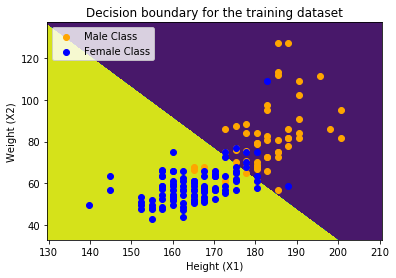

In [10]:
# Decision boundary equation #
print('Decision boundary equation:\n', 'y = ', w0, ' + ', w1, '* X_1 + ', w2, '* X_2')

# Split the training data into classes #
Xtrain1 = Xtrain[ytrain == 1]
Xtrain2 = Xtrain[ytrain == 2]

# -> Plotting the decision boundary <- #
# Find the maximum and minimum values for each feature of the training dataset #
x_min, x_max = Xtrain[:, 0].min() - 10, Xtrain[:, 0].max() + 10
y_min, y_max = Xtrain[:, 1].min() - 10, Xtrain[:, 1].max() + 10

# Create a meshgrid for the dataset #
xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

# Create the boundary #
Z_train = LogReg.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)

# Plot the decision boundary #
plt.contourf(xx_train, yy_train, Z_train)

# Plot the training dataset for the two classes #
plt.scatter(Xtrain1[:, 0], Xtrain1[:, 1], color='orange', label='Male Class')
plt.scatter(Xtrain2[:, 0], Xtrain2[:, 1], color='blue', label='Female Class')
plt.title('Decision boundary for the training dataset')
plt.xlabel('Height (X1)')
plt.ylabel('Weight (X2)')
plt.legend()
plt.show()